In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
df = pd.read_csv("data/train.csv", index_col=0)
# df['Deck'] = df[~df['Cabin'].isnull()]['Cabin'].str[0]
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['FamSize'] = df['Parch'] + df['SibSp']

decks_df = df['Cabin'].str.extract('(?P<Deck>\w)(?P<CabinNumber>\d+)', expand=True)
deck_dummies = pd.get_dummies(decks_df['Deck'], prefix='Deck')
title_dummies = pd.get_dummies(df['Title'])
gender_dummies = pd.get_dummies(df['Sex'])
class_dummies = pd.get_dummies(df['Pclass'], prefix='Class')

# saving to variables and using .concat() once seems to be much faster
df = pd.concat([df, decks_df, deck_dummies, title_dummies, gender_dummies, class_dummies], axis=1)

In [6]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression (no feature engineering)

In [4]:
X = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()
y = X.pop('Survived')

In [5]:
X_train_minimal, X_test_minimal, y_train_minimal, y_test_minimal = train_test_split(X, y)

In [8]:
logreg = LogisticRegressionCV(n_jobs=-1)

In [9]:
logreg.fit(X_train_minimal, y_train_minimal)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [10]:
y_pred = logreg.predict(X_test_minimal)

In [14]:
cfn_matrix_minimal = confusion_matrix(y_test_minimal, y_pred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[94 12]
 [37 36]]


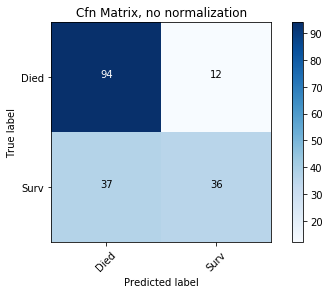

In [11]:
cfn_matrix_minimal = confusion_matrix(y_test_minimal, y_pred)
plt.figure()
plot_confusion_matrix(cfn_matrix_minimal, ['Died', 'Surv'], title="Cfn Matrix, no normalization")

Normalized confusion matrix
[[ 0.88679245  0.11320755]
 [ 0.50684932  0.49315068]]


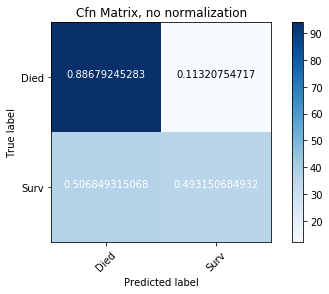

In [12]:
cfn_matrix_minimal = confusion_matrix(y_test_minimal, y_pred)
plt.figure()
plot_confusion_matrix(cfn_matrix_minimal, ['Died', 'Surv'], normalize=True, title="Cfn Matrix, no normalization")

In [13]:
print(classification_report(y_test_minimal, y_pred, target_names=['Died', 'Surv']))

             precision    recall  f1-score   support

       Died       0.72      0.89      0.79       106
       Surv       0.75      0.49      0.60        73

avg / total       0.73      0.73      0.71       179



### KNN Results

Confusion matrix, without normalization
[[88 26]
 [24 41]]


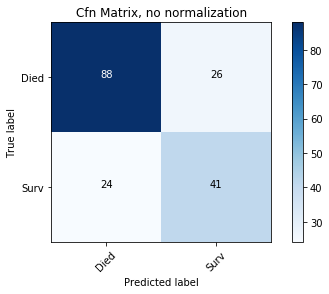

In [43]:
plt.figure()
plot_confusion_matrix(cfn_matrix_minimal, ['Died', 'Surv'], title="Cfn Matrix, no normalization")

Normalized confusion matrix
[[ 0.77  0.23]
 [ 0.37  0.63]]


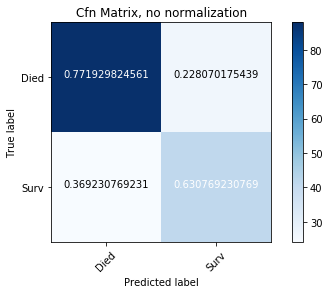

In [44]:
plt.figure()
plot_confusion_matrix(cfn_matrix_minimal, ['Died', 'Surv'], normalize=True, title="Cfn Matrix, no normalization")

In [35]:
sum(y_test_minimal)/len(y_test_minimal)

0.36312849162011174

In [36]:
sum(y_pred)/len(y_pred)

0.37430167597765363

In [39]:
cfn_matrix_minimal.sum(axis=1)

array([114,  65])

In [47]:
print(classification_report(y_test_minimal, y_pred, target_names=['Died', 'Surv']))

             precision    recall  f1-score   support

       Died       0.79      0.77      0.78       114
       Surv       0.61      0.63      0.62        65

avg / total       0.72      0.72      0.72       179

